# Lab

This Jupyter Notebook demonstrates the usage of the `aibasics` package, including initializing a workspace, mounting Google Drive on Colab, and using HyFI to manage configurations.


In [ ]:
# Install aibasics package
%pip install aibasics

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 샘플 데이터
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3

# 선형 회귀 모델 훈련
model = LinearRegression().fit(X, y)

# 훈련된 모델로 새로운 데이터에 대한 예측 수행
model.predict(np.array([[3, 5]]))

array([16.])

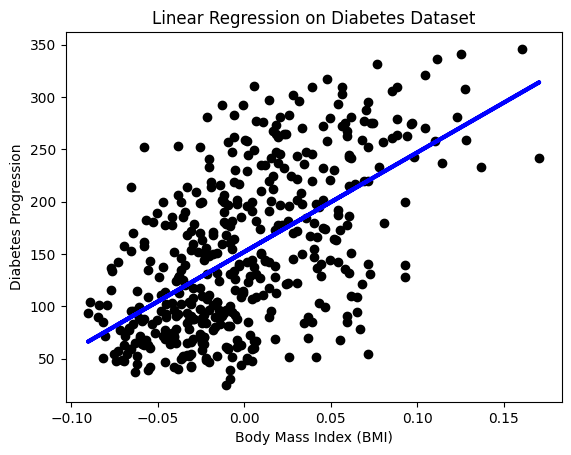

In [8]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# 당뇨병 데이터셋 로드
diabetes = datasets.load_diabetes()
X = diabetes.data[:, None, 2]  # BMI 특징 사용
y = diabetes.target

# 선형 회귀 모델 생성 및 학습
model = linear_model.LinearRegression()
model.fit(X, y)

# 결과 시각화
plt.scatter(X, y, color="black")
plt.plot(X, model.predict(X), color="blue", linewidth=3)
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Diabetes Progression")
plt.title("Linear Regression on Diabetes Dataset")
plt.show()

Data Overview:

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Descriptive Statistics:

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-0

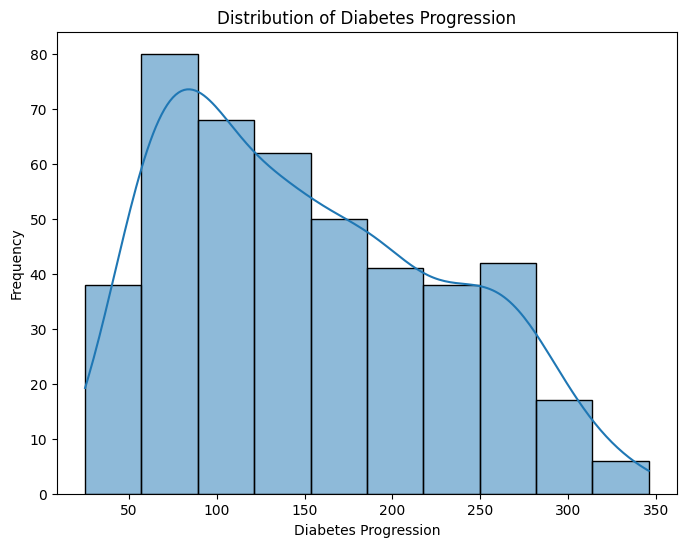

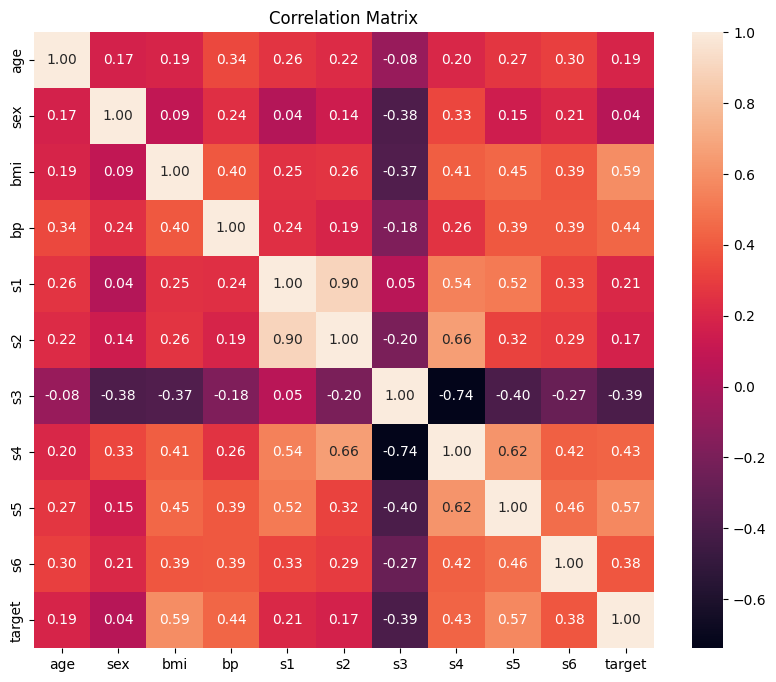

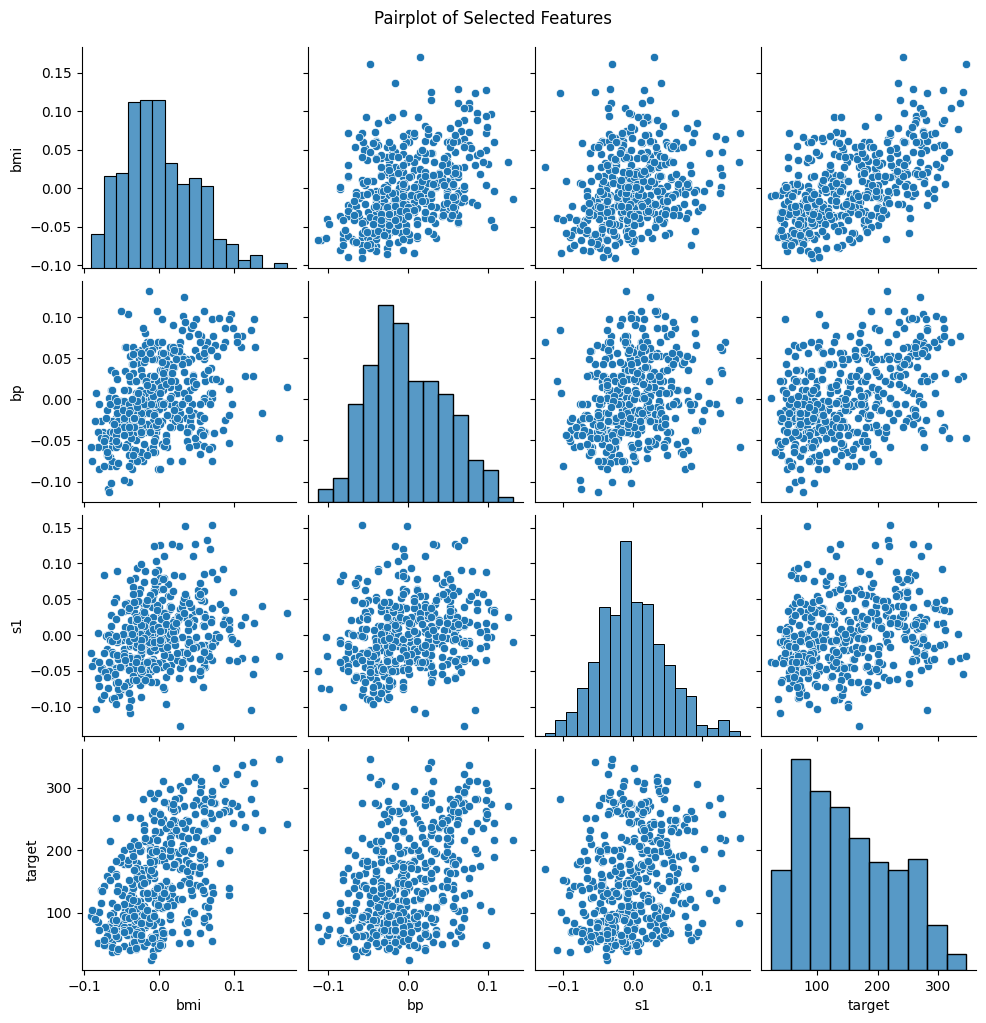

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Convert to DataFrame for easier analysis
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df["target"] = diabetes.target

# 1. Overview of the dataset
print("Data Overview:\n")
print(diabetes_df.head())

# 2. Descriptive statistics
print("\nDescriptive Statistics:\n")
print(diabetes_df.describe())

# 3. Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(diabetes_df["target"], kde=True)
plt.title("Distribution of Diabetes Progression")
plt.xlabel("Diabetes Progression")
plt.ylabel("Frequency")
plt.show()

# 4. Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 5. Visualizing relationships between variables
# Pairplot for a subset of variables
sns.pairplot(diabetes_df[["bmi", "bp", "s1", "target"]])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()